Q1. Importing the necessary libraries

In [57]:
#imported all necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import copy

Q2. Reading the data as dataframe

In [58]:
#csv file inforamtion is read to a dataframe
dataframe = pd.read_csv('./insurance.csv')

Q3.a Printing the Shape of the data

In [59]:
#Shape of data using shape function
dataframe.shape

(1338, 7)

Q3.b Printing Datatypes

In [60]:
#Data types of each column by dtype function
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Q3.c Checking the presence of missing values

In [62]:
#finding the null values, found no null values
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Q3.d Printing the 5 point summery of numeric data

In [63]:
#printing the five point sumery of data using describe function
print(dataframe.age.describe())
print(dataframe.bmi.describe())
print(dataframe.children.describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


Q3.e Distribution of bmi,age,charges

AxesSubplot(0.125,0.125;0.775x0.755)


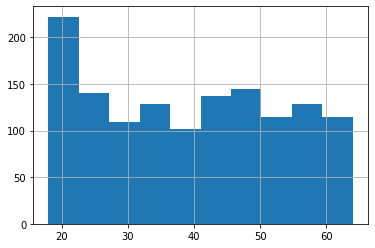

In [81]:
#plotting distribution of age by histogram
print(dataframe.age.hist())
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


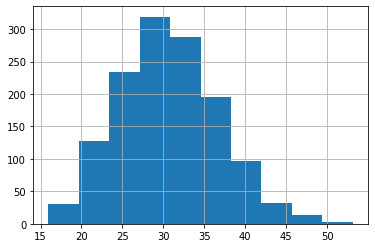

In [80]:
#plotting distribution of bmi by histogram
print(dataframe.bmi.hist())
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


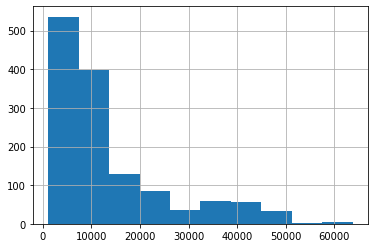

In [79]:
#plotting distribution of charges by histogram
print(dataframe.charges.hist())
plt.show()

Q3.f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

In [76]:
#Printing the skewness & observing it in a box plot
print("Skewness of bmi : "+str(dataframe.bmi.skew(axis = 0, skipna = True)))
print("Skewness of age : "+str(dataframe.age.skew(axis = 0, skipna = True)))
print("Skewness of charges : "+str(dataframe.charges.skew(axis = 0, skipna = True)))

Skewness of bmi : 0.2840471105987448
Skewness of age : 0.05567251565299186
Skewness of charges : 1.5158796580240388


Q3.g Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

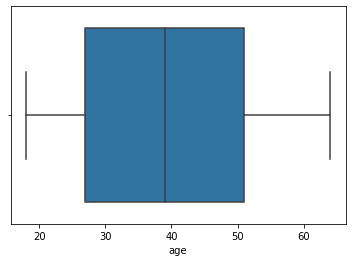

In [78]:
sns.boxplot(dataframe['age'])
plt.show()

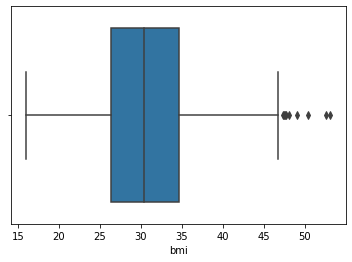

In [82]:
sns.boxplot(dataframe['bmi'])
plt.show()

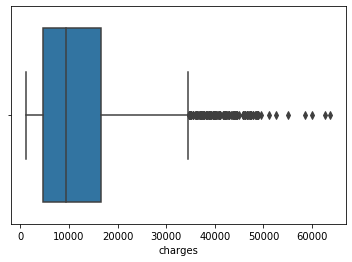

In [83]:
sns.boxplot(dataframe['charges'])
plt.show()

Q3.h Distribution of categorical columns (include children)

In [85]:
#Used padas function value_counts
dataframe['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
dataframe['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
dataframe['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
dataframe['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Q3.i Pair plot that includes all the columns of the data frame

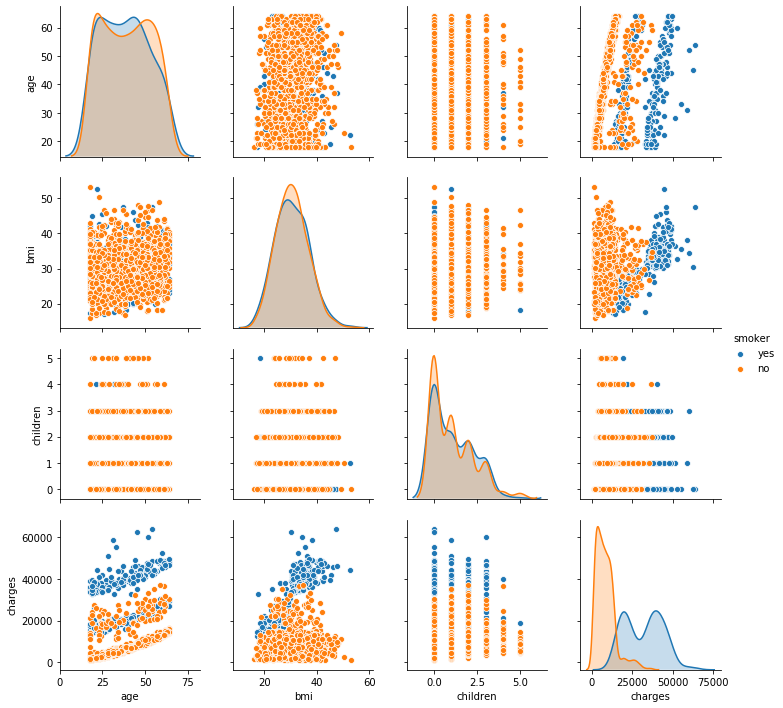

In [89]:
#plotting seaborn pair plot for the entire dataframe
sns.pairplot(dataframe,hue='smoker')
plt.show()

Q4.a Do charges of people who smoke differ significantly from the people who don't ?

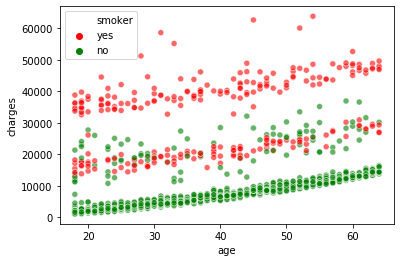

In [90]:
#plottig the age,charges in scatter plot
sns.scatterplot(dataframe.age, dataframe.charges,hue=dataframe.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [97]:
x = np.array(dataframe[dataframe.smoker == 'yes'].charges)
y= np.array(dataframe[dataframe.smoker == 'no'].charges)

In [98]:

#performing T test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print('charges f the smoker & non-smoker are not the same where p value is ({}) < 0.05'.format(p_value))
else:
    print('charges f the smoker & non-smoker are same where p value is ({}) < 0.05'.format(p_value))

charges f the smoker & non-smoker are not the same where p value is (8.271435842177219e-283) < 0.05


Q4. b Does bmi of males differ significantly from that of females?

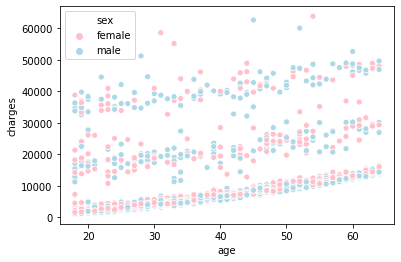

In [99]:
#plottig scatter plot
sns.scatterplot(dataframe.age, dataframe.charges,hue=dataframe.sex,palette= ['pink','lightblue'] )
plt.show()

In [100]:
# T-test to check dependency of bmi on gender

x = np.array(dataframe[dataframe.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(dataframe[dataframe.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print('Gender has an effect on bmi ({}) < 0.05'.format(p_value))
else:
    print('Gender has no effect on bmi ({}) > 0.05'.format(p_value))

Gender has no effect on bmi (0.08997637178984932) > 0.05


Q4. c Is the proportion of smokers significantly different in different genders? 

In [107]:
# using Chi_square test

plot = pd.crosstab(dataframe['sex'],dataframe['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print('Gender has an effect on smoking habits ({}) < 0.05'.format(p_value))
else:
    print('Gender has no effect on smoking habits ({}) < 0.05'.format(p_value))
plot

Gender has an effect on smoking habits (0.006548143503580696) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Q4 D. Is the distribution of bmi across women with no children, one child and two children, the same?

In [109]:
# distributions of bmi values for females having different number of children, are significantly different or not ?

female_df = copy.deepcopy(dataframe[dataframe['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)

if p_value < 0.05:  # Setting our significance level at 5%
    print('No. of children has an effect on bmi ({}) < 0.05'.format(p_value))
else:
    print('No. of children has no effect on bmi ({}) > 0.05'.format(p_value))

No. of children has no effect on bmi (0.7158579926754841) > 0.05
